In [4]:
library(Seurat)
library(ggplot2)
BiocManager::install("org.Hs.eg.db")
library(slingshot)
library(AnnotationDbi)
library(org.Hs.eg.db)
library(dplyr)
library(tidyverse)
install.packages("ggpubr", repos = "http://cran.us.r-project.org")
library(RColorBrewer)
install.packages("wesanderson")
library(wesanderson)
BiocManager::install('limma')
currentcol<-c('#B40F20',"#E59D07","lightgrey","#6C5B4E","#F69572","#84B678","#E49417","#5BBCD6","#FB7069","#C1BB7B","#F1DD7B","black","dark grey","#6C261C","#A14C29")

Attaching SeuratObject

Attaching sp

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.14 (BiocManager 1.30.18), R 4.1.3 (2022-03-10)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'org.Hs.eg.db'”
Old packages: 'BiocManager', 'bit', 'boot', 'brew', 'broom', 'bslib', 'callr',
  'cli', 'cluster', 'curl', 'data.table', 'DBI', 'dbplyr', 'desc', 'devtools',
  'digest', 'DT', 'evaluate', 'foreign', 'formatR', 'future', 'future.apply',
  'gert', 'ggbeeswarm', 'ggforce', 'ggplot2', 'ggpubr', 'ggrepel', 'gh',
  'gitcreds', 'globals', 'gtools', 'hdf5r', 'highr', 'Hmisc', 'hms',
  'htmlTable', 'htmltools', 'htmlwidgets', 'httpuv', 'IRkernel', 'isoband',
  'jpeg', 'jsonlite', 'knitr', 'latticeExtra', 'listenv', 'lme4', 'lubridate',
  'MASS', 'Matrix', 'matrixStats', 'mgcv', 'modelr', 'nlme', 'nnet

In [5]:
CZI.data<-Read10X("./CZI/aggr-6/aggrout/outs/filtered_feature_bc_matrix/")
CZI6<-CreateSeuratObject(counts = CZI.data, min.cells = 50, min.features = 500, names.field = 2, names.delim = "-")

In [ ]:
Idents(CZI6)<-CZI6$orig.ident
CZI6[["Pt"]]<-plyr::mapvalues(x = Idents(CZI6), from= c("1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31","32","33","34","35","36","37","38","39","40"), to=c("Pt1","Pt1","Pt1","Pt1","Pt1","Pt1","Pt1","Pt1","Pt1","Pt2","Pt2","Pt2","Pt2","Pt3","Pt3","Pt3","Pt3","Pt3","Pt3","Pt4","Pt4","Pt4","Pt4","Pt4","Pt4","Pt4","Pt4","Pt5","Pt5","Pt5","Pt5","Pt5","Pt5","Pt5","Pt5","Pt6","Pt6","Pt6","Pt6","Pt6"))
CZI6[["Site"]]<-plyr::mapvalues(x = Idents(CZI6), from= c("1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31","32","33","34","35","36","37","38","39","40"), to=c("RCA","RCA","ASC","ARCH","DESC","INFRARENAL","ILIAC","PA","CAROTID","RCA","DESC","INFRARENAL","CAROTID","RCA","ASC","ARCH","DESC","CAROTID","PA","RCA-d","RCA","ASC","ARCH","DESC","ILIAC","CAROTID","PA","RCA","ASC","ARCH","DESC","ILIAC","CAROTID","PA","ROOT","RCA","ASC","ARCH","ROOT","IMA"))
Idents(CZI6)<-CZI6$Pt
CZI6[["Gender"]]<-plyr::mapvalues(x = Idents(CZI6), from= c("Pt1","Pt2","Pt3","Pt4","Pt5","Pt6"), to=c("Female","Male","Female","Male","Male","Female"))
CZI6[["Age"]]<-plyr::mapvalues(x = Idents(CZI6), from= c("Pt1","Pt2","Pt3","Pt4","Pt5","Pt6"), to=c(67,48,69,46,39,38))
Idents(CZI6)<-CZI6$Site
CZI6<-subset(CZI6, idents = "RCA-d", invert = T)
CZI6<-subset(CZI6, idents = "IMA", invert = T)
#DimPlot(CZI6, group.by = "Pt",  shuffle = T)
#DimPlot(CZI6, group.by = "Site", shuffle = T)

Centering and scaling data matrix

PC_ 1 
Positive:  CALD1, MGP, ADIRF, BGN, TAGLN, MYL9, CLU, TPM2, AEBP1, COL1A2 
	   CRYAB, FHL1, C1R, PRELP, IGFBP6, NEXN, DKK3, PPP1R14A, TIMP3, PDLIM3 
	   NNMT, OGN, MFAP4, C1S, FSTL1, EFEMP1, LMOD1, ACTA2, FN1, COL4A2 
Negative:  TYROBP, FCER1G, LAPTM5, AIF1, ITGB2, C1QC, FCGR2A, CD14, C1QA, C1QB 
	   VAMP8, MSR1, MS4A7, VSIG4, CTSS, CD163, MS4A6A, FCGR3A, PTPRC, SPI1 
	   CSF1R, C3AR1, CD53, LCP1, C5AR1, HCLS1, LYZ, ALOX5AP, MRC1, HLA-DRA 
PC_ 2 
Positive:  PECAM1, ADGRL4, ECSCR, PLVAP, VWF, CLEC14A, EMCN, SOX18, IFI27, CYYR1 
	   EGFL7, RAMP3, GIMAP7, MMRN2, LDB2, FLT1, RAMP2, HYAL2, TSPAN7, CDH5 
	   PTPRB, TMEM88, ACKR1, PALMD, NRN1, CXorf36, MYCT1, NOSTRIN, JAM2, CLDN5 
Negative:  BGN, FTL, CRYAB, TAGLN, TPM2, AEBP1, COL1A2, FHL1, CTSD, MFAP4 
	   NEXN, PRELP, LMOD1, DKK3, ACTA2, MYL9, GPNMB, OGN, FRZB, CALD1 
	   IGFBP6, PPP1R14A, PLN, MYH11, COL3A1, EFEMP1, FGL2, ITGA8, MXRA8, RAMP1 
PC_ 3 
Positive:  DCN, FBLN1, C3, SCARA5, MGST1, FBLN2, 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 120367
Number of edges: 4373075

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9755
Number of communities: 15
Elapsed time: 43 seconds


1 singletons identified. 14 final clusters.

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
10:37:52 UMAP embedding parameters a = 0.9922 b = 1.112

10:37:52 Read 120367 rows and found 50 numeric columns

10:37:52 Using Annoy for neighbor search, n_neighbors = 30

10:37:52 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:38:09 Writing NN index file to temp file /tmp/RtmpTixB2E/file939be613d7e32

10:38:09 Searching Annoy index using 1 thread, search_k = 3000

10:38:56 Annoy recall = 100%

10:38:57 Commencing smooth kNN distance calib

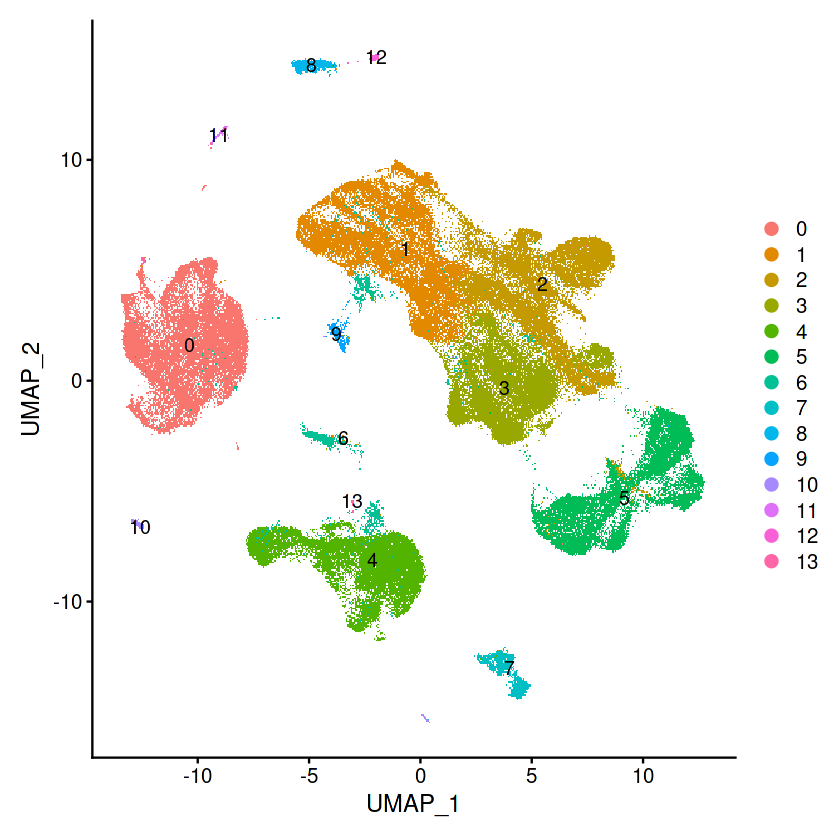

In [5]:
CZI6[["percent.mt"]] <- PercentageFeatureSet(CZI6, pattern = "^MT-")
CZI6[["percent.rb"]] <- PercentageFeatureSet(CZI6, pattern = "^RP")
CZI6 <- subset(CZI6, subset = nFeature_RNA > 1000 & nFeature_RNA < 8000 & percent.mt < 7.5)
CZI6 <- NormalizeData(CZI6)
all.genes <- rownames(CZI6)
CZI6 <- ScaleData(CZI6, features = all.genes)
CZI6 <- FindVariableFeatures(CZI6, selection.method = "vst", nfeatures = 2000)
CZI6 <- RunPCA(CZI6, features = VariableFeatures(object = CZI6))
CZI6 <- FindNeighbors(CZI6, dims = 1:50)
CZI6 <- FindClusters(CZI6, resolution = 0.1)
CZI6 <- RunUMAP(CZI6, dims = 1:50)
DimPlot(CZI6, label = T)

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 23024 by 120367

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



  |======================================================================| 100%


Found 67 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 23024 genes



  |======================================================================| 100%


Computing corrected count matrix for 23024 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 9.705622 mins

Determine variable features

Place corrected count matrix in counts slot

Regressing out percent.mt, percent.rb

Centering data matrix

Set default assay to SCT

PC_ 1 
Positive:  HLA-DRA, CD74, C1QB, HLA-DRB1, C1QA, C1QC, RNASE1, TYROBP, CCL4, HLA-DPA1 
	   HLA-DQA1, FCER1G, CCL3, SPP1, HLA-DPB1, CD14, AIF1, CXCL8, FTL, CD163 
	   SELENOP, FCGR3A, CXCL3, VSIG4, CXCL2, FCGBP, CCL4L2, FOLR2, CTSB, CCL3L1 
Negative:  DCN, MGP, TAGLN, ACTA2, CFD, PLA2G2A, TPM2, FBLN1, IGFBP7, APOD 
	   IGFBP6, SFRP2, MT2A, IGFBP5, MYL9, MFAP5, CCDC80, PLCG2, LUM, C7 
	   MT1X, CLU, CTGF, RGS5, FN1, ADH1B, SERPINF1, ADIRF, CALD1, TIMP3 
PC_ 2 
Positive:  DCN, CFD, PLA2G2A, APOD, SFRP2, FBLN1, MFAP5, C3, SERPINF1, C7 
	   CCDC80, CXCL14, PI16, RARRES1, LUM, IGF1, IGFBP6, MGST1, PTGDS, SLPI 
	   SCARA5, C1R, GPX3, ADH1B, GSN, HTRA3, FBLN2, FBN1, MMP2, ABCA8 
Negative:  ACTA2, TAGLN, TPM2, MYL9, RGS5, MYH11, PPP1R14A, RERGL, C11

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 120367
Number of edges: 3897945

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9715
Number of communities: 10
Elapsed time: 44 seconds


10:56:48 UMAP embedding parameters a = 0.9922 b = 1.112

10:56:48 Read 120367 rows and found 50 numeric columns

10:56:48 Using Annoy for neighbor search, n_neighbors = 30

10:56:48 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:57:05 Writing NN index file to temp file /tmp/RtmpTixB2E/file939be5802c3b0

10:57:05 Searching Annoy index using 1 thread, search_k = 3000

10:57:52 Annoy recall = 100%

10:57:55 Commencing smooth kNN distance calibration using 1 thread

10:58:01 Initializing from normalized Laplacian + noise

10:58:21 Commencing optimization for 200 epochs, with 5170162 positive edges

10:59:20 Optimization finished

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



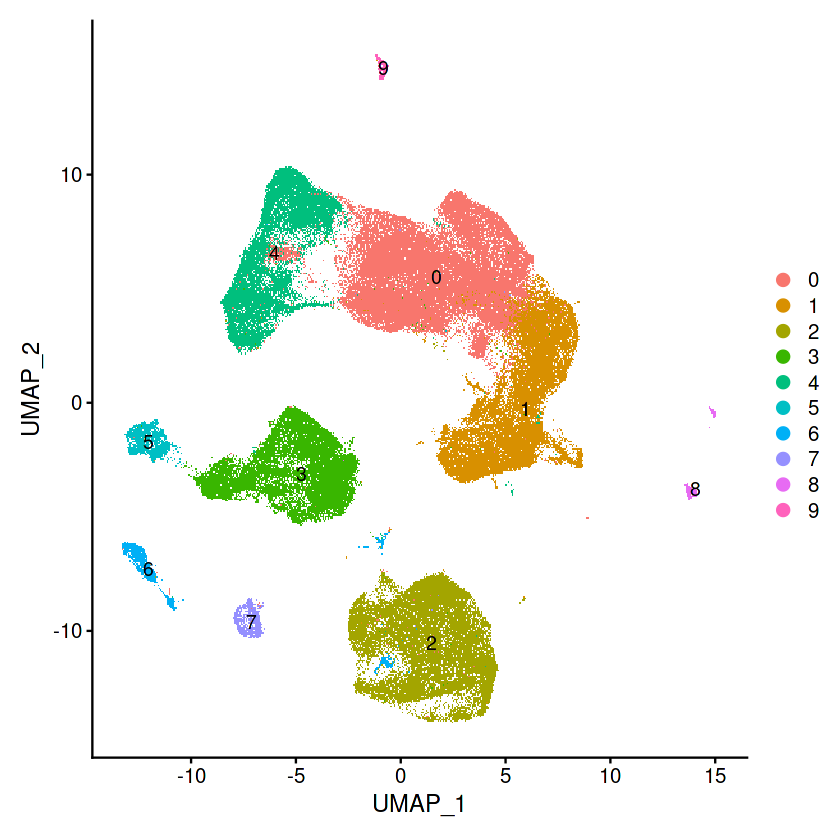

In [6]:
CZI6<-SCTransform(CZI6, vars.to.regress = c("percent.mt","percent.rb"))
CZI6<-RunPCA(CZI6)
CZI6<-FindNeighbors(CZI6, dims = 1:50)
CZI6<-FindClusters(CZI6, resolution = 0.1)
CZI6<-RunUMAP(CZI6, dims = 1:50)
DimPlot(CZI6, label = T)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Picking joint bandwidth of 154

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Picking joint bandwidth of 0.255



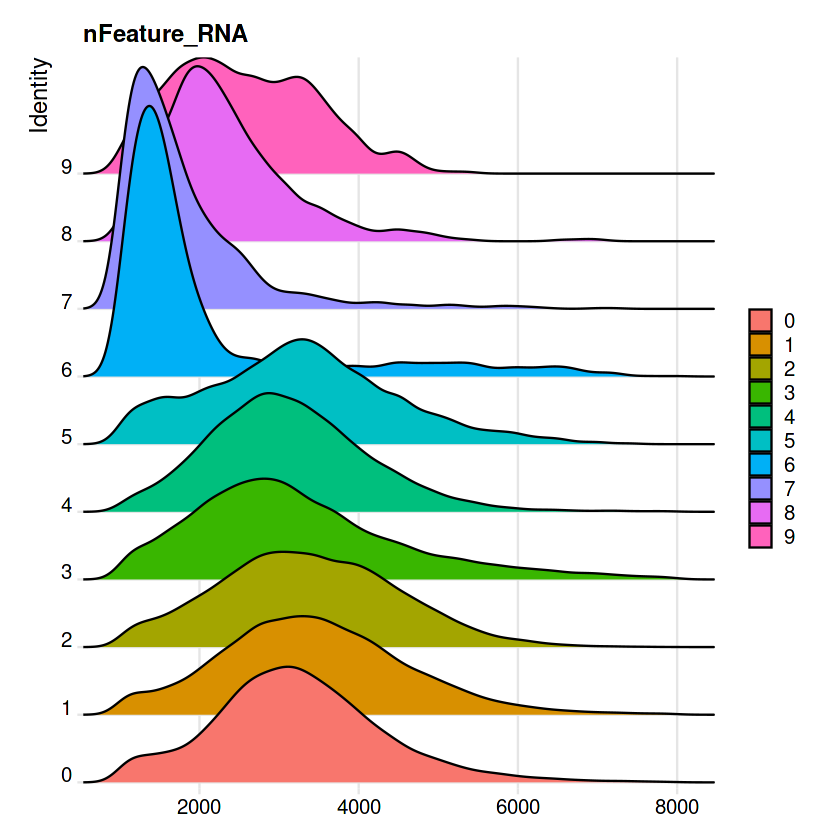

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Picking joint bandwidth of 1130



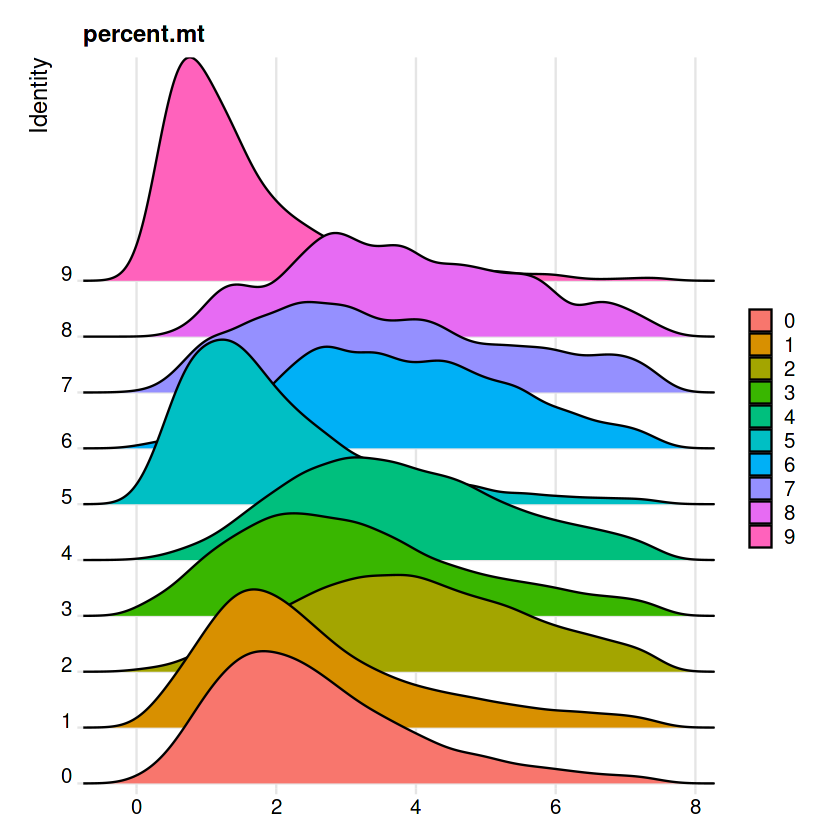

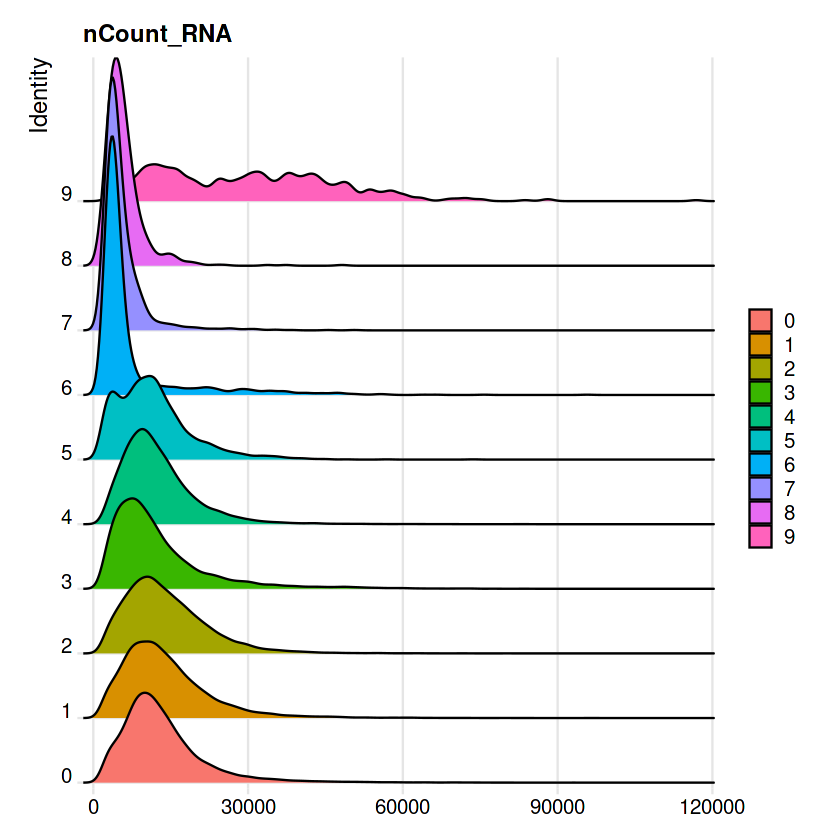

In [7]:
RidgePlot(CZI6, features = "nFeature_RNA")
RidgePlot(CZI6, features = "percent.mt")
RidgePlot(CZI6, features = "nCount_RNA")

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



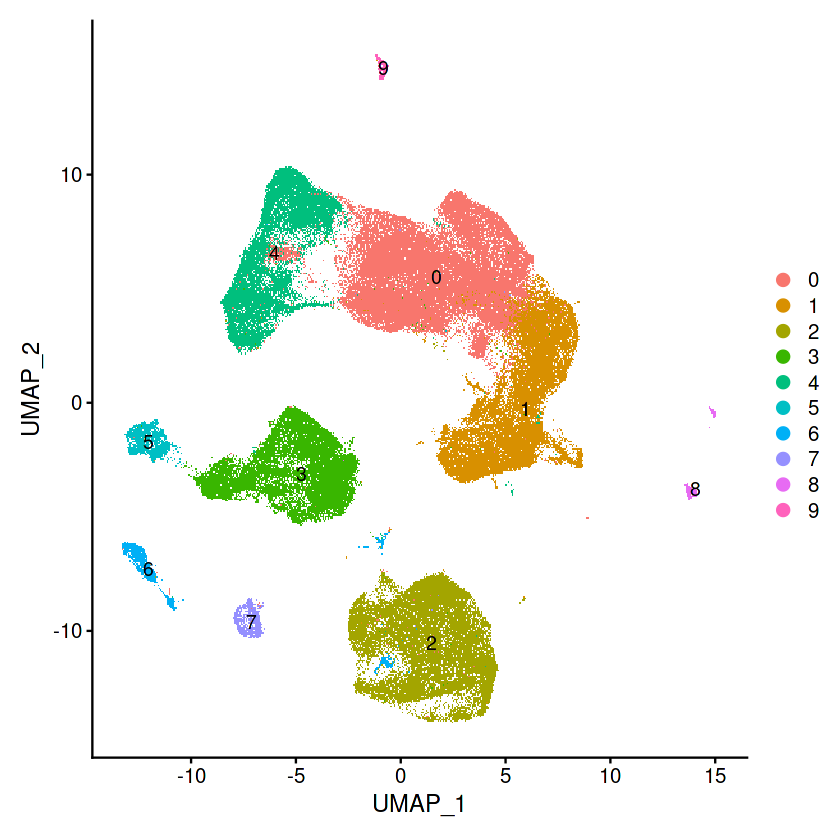

In [8]:
DimPlot(CZI6, label = T)

In [8]:
#CZI6 <- subset(CZI6, subset = nFeature_RNA > 1500)
CZI6

An object of class Seurat 
46048 features across 128830 samples within 2 assays 
Active assay: SCT (23024 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [ ]:
CZI7<-CreateSeuratObject(counts = CZI.data, min.cells = 50, min.features = 500, names.field = 2, names.delim = "-")
CZI7[["percent.mt"]] <- PercentageFeatureSet(CZI7, pattern = "^MT-")
CZI7[["percent.rb"]] <- PercentageFeatureSet(CZI7, pattern = "^RP")
CZI7 <- subset(CZI7, subset = nFeature_RNA > 1500 & nFeature_RNA < 8000 & percent.mt < 7.5)
Idents(CZI7)<-CZI7$orig.ident
CZI7[["Pt"]]<-plyr::mapvalues(x = Idents(CZI7), from= c("1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31","32","33","34","35","36","37","38","39","40"), to=c("Pt1","Pt1","Pt1","Pt1","Pt1","Pt1","Pt1","Pt1","Pt1","Pt2","Pt2","Pt2","Pt2","Pt3","Pt3","Pt3","Pt3","Pt3","Pt3","Pt4","Pt4","Pt4","Pt4","Pt4","Pt4","Pt4","Pt4","Pt5","Pt5","Pt5","Pt5","Pt5","Pt5","Pt5","Pt5","Pt6","Pt6","Pt6","Pt6","Pt6"))
CZI7[["Site"]]<-plyr::mapvalues(x = Idents(CZI7), from= c("1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31","32","33","34","35","36","37","38","39","40"), to=c("RCA","RCA","ASC","ARCH","DESC","INFRARENAL","ILIAC","PA","CAROTID","RCA","DESC","INFRARENAL","CAROTID","RCA","ASC","ARCH","DESC","CAROTID","PA","RCA-d","RCA","ASC","ARCH","DESC","ILIAC","CAROTID","PA","RCA","ASC","ARCH","DESC","ILIAC","CAROTID","PA","ROOT","RCA","ASC","ARCH","ROOT","IMA"))
Idents(CZI7)<-CZI6$Pt
CZI7[["Gender"]]<-plyr::mapvalues(x = Idents(CZI7), from= c("Pt1","Pt2","Pt3","Pt4","Pt5","Pt6"), to=c("Female","Male","Female","Male","Male","Female"))
CZI7[["Age"]]<-plyr::mapvalues(x = Idents(CZI7), from= c("Pt1","Pt2","Pt3","Pt4","Pt5","Pt6"), to=c(67,48,69,46,39,38))
Idents(CZI7)<-CZI7$Site
CZI7<-subset(CZI7, idents = "RCA-d", invert = T)
CZI7<-subset(CZI7, idents = "IMA", invert = T)

CZI7 <- NormalizeData(CZI7)
all.genes <- rownames(CZI7)
CZI7 <- ScaleData(CZI7, features = all.genes)
CZI7


In [10]:
CZI5.list <- SplitObject(CZI7, split.by = "Pt")
options(future.globals.maxSize = 240000 * 1024^2)
for (i in 1:length(CZI5.list)) {
    CZI5.list[[i]] <- SCTransform(CZI5.list[[i]], vars.to.regress = c("percent.mt"), verbose = FALSE, variable.features.n = 6000)
}
CZI5.features <- SelectIntegrationFeatures(object.list = CZI5.list, nfeatures = 4000)
print('step1')
CZI5.list <- PrepSCTIntegration(object.list = CZI5.list, anchor.features = CZI5.features, 
    verbose = FALSE)
print('step2')
CZI5.anchors <- FindIntegrationAnchors(object.list = CZI5.list, normalization.method = "SCT", 
    anchor.features = CZI5.features, verbose = FALSE)
print('step3')
CZI6.integrated <- IntegrateData(anchorset = CZI5.anchors, normalization.method = "SCT", 
    verbose = FALSE)


[1] "step1"
[1] "step2"
[1] "step3"


Warning message:
“Attempting to merge an SCTAssay with another Assay type 
Converting all to standard Assay objects.”
Warning message:
“Attempting to merge an SCTAssay with another Assay type 
Converting all to standard Assay objects.”


In [18]:
CZI5.features <- SelectIntegrationFeatures(object.list = CZI5.list, nfeatures = 4000)
print('step1')
CZI5.list <- PrepSCTIntegration(object.list = CZI5.list, anchor.features = CZI5.features, 
    verbose = FALSE)
print('step2')
CZI5.anchors <- FindIntegrationAnchors(object.list = CZI5.list, normalization.method = "SCT", 
    anchor.features = CZI5.features, verbose = FALSE)
print('step3')
CZI6.integrated <- IntegrateData(anchorset = CZI5.anchors, normalization.method = "SCT", 
    verbose = FALSE)



[1] "step1"
[1] "step2"
[1] "step3"


Warning message:
“Attempting to merge an SCTAssay with another Assay type 
Converting all to standard Assay objects.”
Warning message:
“Attempting to merge an SCTAssay with another Assay type 
Converting all to standard Assay objects.”


In [ ]:
CZI6.integrated <- IntegrateData(anchorset = CZI5.anchors, normalization.method = "SCT", 
    verbose = FALSE)


Warning message:
“Not all features provided are in this Assay object, removing the following feature(s): MROH8, GPHA2, HLA-DQA2, CRABP1, HIST1H3B, CDH7, WIF1, SOX10, SPRR2F, LYPD2, AADAC, SLC1A2, CYB5D2, AC010319.3, KIF1A, FOXD3-AS1, MAG, DNAJC18, GFRA3, NKX6-2, LGALS2, FSTL5, HCN1, FRMD6-AS1, TRIM63, NPY, TPSD1, DIRC3, Z95114.1, PEX5L, LINC01748, SYT10, CCL22, KIF25, AC120193.1, KCNG1, AGTR2, SIX3, UPK3B, CDH1, DCX, OR51M1, XIST, SLC6A4, AC022081.1, PMEL, GPC5-AS1, PROK1, CTXND1, BIRC7, POU3F2, C10orf82, TNFSF4, HIST1H3F, ZNF536, AC116345.1, XCR1, TMEM196, LINC00337, PI3, SVOPL, SLITRK6, PRND, PCDH8, ANKRD30B, MSTN, RHAG, KLF3, POU3F4, AL121936.1, KRT1, DUOXA2, RRP12, SIGLEC6, TMEM215, HIST1H3G, AC008080.4, AC004156.1, GRIK3, TRH, SCT, EIF4E, SLC27A6, MMP10, GATA1, ZNF683, CCK, LINC02502, AC097103.2, NPTX1, CAPN6, AC008105.3, CD22, RD3, ETV3, CYB561, DEC1, COL22A1, KLK6, RASGEF1C, CD207, ARHGAP11A, AC015660.2, ASCL1, CYP2J2, CLEC3A, AL662860.1, FADS6, AL603756.1, STAP1, IFNG, BDKRB1, 

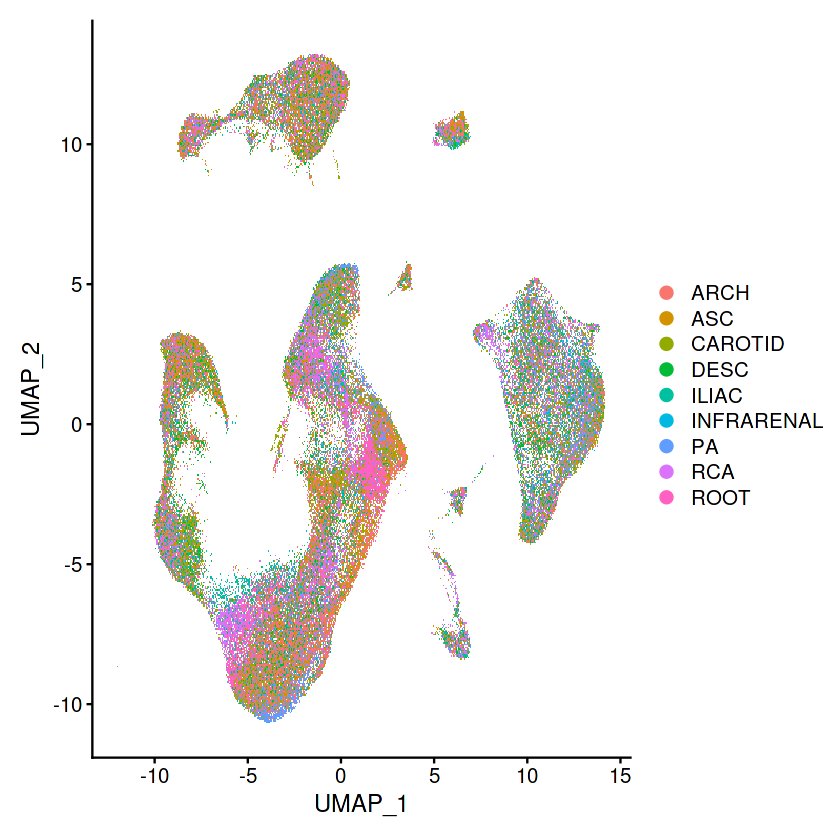

In [11]:
CZI6.integrated<-FindVariableFeatures(CZI6.integrated)
CZI6.integrated<-RunPCA(CZI6.integrated)
CZI6.integrated<-RunUMAP(CZI6.integrated, dims = 1:50)
DimPlot(CZI6.integrated)


In [ ]:
saveRDS(CZI6.integrated, file = "./CZI6intergrated-3-30-2022.rds")

In [19]:
sessionInfo()

R version 4.1.3 (2022-03-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.4 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.9.0
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.9.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] wesanderson_0.3.6           RColorBrewer_1.1-3         
 [3] forcats_0.5.1               stringr_1.4.0              
 [5] purrr_0.3.4                 readr_2.1.2                
 [7] tidyr_1.2.0                 tibble_3.1.6               
 [9] tidyv